In [4]:
# Importing the required tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# Importing the dataset
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Manually mapping the sentiment column
data["sentiment"] = data["sentiment"].map({"positive":1, "negative":0})
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
# Function to clean reviews column
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', "", text)
    text = re.sub(r'[^a-z\s]', "", text)
    return text

In [6]:
# Cleaning the review column
data["cleaned_review"] = data["review"].apply(clean_text)
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love in the time of money is a ...


In [7]:
# Dropping the uncleanned review column
data.drop("review", axis=1)

,sentiment,cleaned_review
0,1,one of the other reviewers has mentioned that ...
1,1,a wonderful little production the filming tech...
2,1,i thought this was a wonderful way to spend ti...
3,0,basically theres a family where a little boy j...
4,1,petter matteis love in the time of money is a ...
...,...,...
49995,1,i thought this movie did a down right good job...
49996,0,bad plot bad dialogue bad acting idiotic direc...
49997,0,i am a catholic taught in parochial elementary...
49998,0,im going to have to disagree with the previous...


In [8]:
# Vectorizing the data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["cleaned_review"])
y = data["sentiment"]

In [9]:
# Splitting the data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [10]:
# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Predicting on test data
y_preds = model.predict(X_test)
y_preds

array([1, 1, 0, ..., 0, 0, 1], shape=(10000,))

In [15]:
# Evaluating using accuracy
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.8939

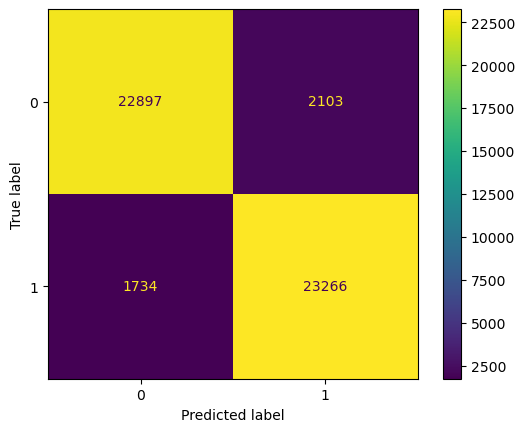

In [16]:
# Evaluating using confusion matrix
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y)

In [17]:
# Evaluating using classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4992
           1       0.89      0.90      0.90      5008

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

